# CS 135 day 04: Hyperparameter Selection on Val. Set

We will explore *hyperparameter selection* using the new model family we just learned about, Linear Regression with Polynomial Features

# Objectives

* Learn how to compute polynomial features
* Try out selecting the polynomial degree on a fixed validation set

* Learn how to use sklearn's built-in Polynomial feature transformer
* Learn how to use sklearn pipelines to compose useful elementary transformations and predictors


# Outline

* [Part 1: Linear Regression on Sine Wave dataset](#part1)
* [Part 2: Trying Polynomial Features + Linear Regression by hand](#part2)
* [Part 3: Selecting degree on Fixed Validation Set](#part3)
* [Part 4: Behavior with multiple input features](#part4)
* [Part 5: Pipelines](#part5)


# Takeaways

* Hyperparameter selection is important to avoid overfitting (and underfitting)
* We cannot use the training set alone to select hyperparameters
* We should use a separate validation set to compute the error we use to select hyperparameters (or do cross-validation)
* Sklearn has many built-in features (Pipelines, feature transformers, etc) that make your life easier if you know how to use them well
* * They all follow a standard interface (aka "API")

In [ ]:
import numpy as np

# Import the pandas (data management library)
import pandas as pd

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [ ]:
import sklearn.linear_model
import sklearn.pipeline

# Prepare a simple 'sine-wave' dataset

In [ ]:
SEED = 12345
prng = np.random.RandomState(SEED)

In [ ]:
def true_prediction_function(x):
    return np.sin(2.1 * x)

In [ ]:
L = 9        # num training examples (to estimate weight parameters)

x_tr_L = np.linspace(-3, 3, L) + 0.09 * prng.randn(L)
y_tr_L = true_prediction_function(x_tr_L) + 0.3 * prng.randn(L)

In [ ]:
N = 15      # num validation examples (to select hyperparameters)

x_va_N = np.linspace(-3.1, 3.1, N)
y_va_N = true_prediction_function(x_va_N) + 0.3 * prng.randn(N)

In [ ]:
M = 500      # num testing examples (to show "true" generalization)

x_te_M = np.linspace(-3.5, 3.5, M)
y_te_M = true_prediction_function(x_te_M) + 0.3 * prng.randn(M)

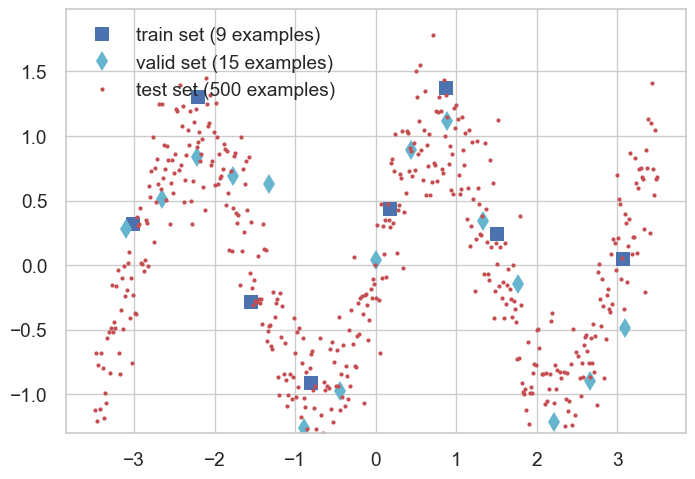

In [ ]:
plt.plot(x_tr_L, y_tr_L, 'bs', markersize=10, label='train set (%d examples)' % L)
plt.plot(x_va_N, y_va_N, 'cd', markersize=10, label='valid set (%d examples)' % N)
plt.plot(x_te_M, y_te_M, 'r.', label='test set (%d examples)' % M)

plt.legend(loc='upper left');
plt.ylim([-1.3, 1.98]);

In [ ]:
# Reshape all 'x' arrays so they are 2D with shape (n_examples, 1)

x_tr_L1 = x_tr_L[:,np.newaxis]
x_va_N1 = x_va_N[:,np.newaxis]
x_te_M1 = x_te_M[:,np.newaxis]

<a id="part1"></a>

# Part 1: Linear Regression

First, let's try to fit plain old linear regression to this dataset.

In [ ]:
lin_regr = sklearn.linear_model.LinearRegression()

In [ ]:
# Call 'fit', should update the object in place with fitted coefs
lin_regr.fit(x_tr_L1, y_tr_L)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


What is the learned slope?

In [ ]:
lin_regr.coef_

array([-0.13099341])

What is the learned intercept/bias value?

In [ ]:
lin_regr.intercept_

np.float64(0.10674932955330403)

### Exercise 1a: Can you make predictions using the model above on the heldout test set?

In [ ]:
yhat_te_M = np.ones(M) # TODO something like "lin_regr.predict(...)"

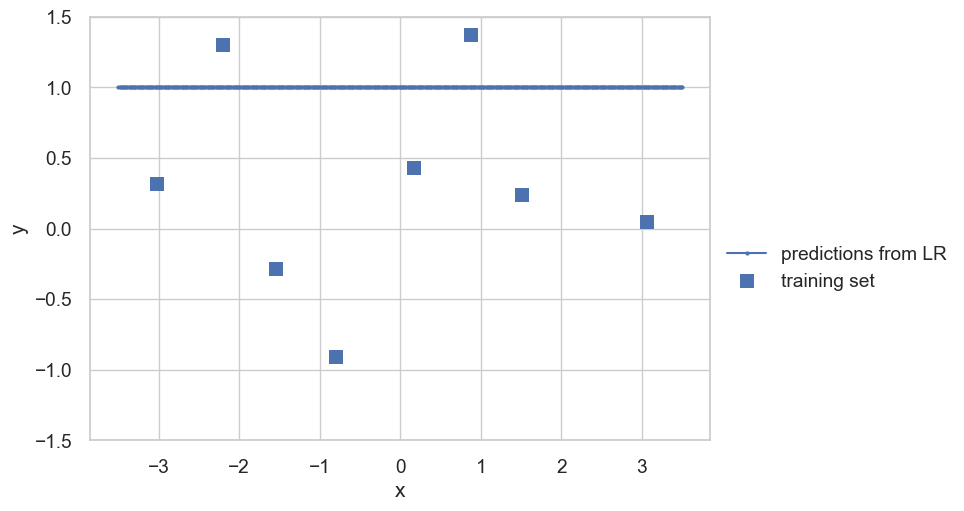

In [ ]:
plt.plot(x_te_M, yhat_te_M, 'b.-', label='predictions from LR')
plt.plot(x_tr_L, y_tr_L, 'bs', markersize=10, label='training set')

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.ylim([-1.5, 1.5]);
plt.xlabel('x');
plt.ylabel('y');

<a id="part2"></a>

# Part 2: Polynomial Features with sklearn

Given our scalar feature $x_i \in \mathbb{R}$, we want to TRANSFORM it to a $F$-degree polynomial feature vector (of size $F+1$)

$$
\begin{align}
\phi_0(x_i) &= [1]
\\
\phi_1(x_i) &= [1 ~~ x_i]
\\
\phi_2(x_i) &= [1 ~~ x_i ~~ x_i^2]
\\
\phi_3(x_i) &= [1 ~~ x_i ~~ x_i^2 ~~ x_i^3] \\
\vdots \\
\phi_F(x_i) &= [1 ~~ x_i ~~ x_i^2 ~~ x_i^3 ~~ \ldots x_i^F]
\end{align}
$$

And then use these transformed features to do linear regression.

That is, we'll learn weights for each of the entries of the vector produced by $\phi_F$. You write code to do this on homework 1, but here we will use sklearn's build-in packages. You can read details of the implementation here:

<https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features>

Create an array to try things out as input

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

my_x_N1 = np.arange(4).reshape(4, 1)
print("Original Features my_x_N1")
print(my_x_N1)

Original Features my_x_N1
[[0]
 [1]
 [2]
 [3]]


In [ ]:
poly = PolynomialFeatures(2)
# call 'fit_transform' to perform the transformation
phi_NG = poly.fit_transform(my_x_N1) 

print("Transformed Features phi_NG using 2-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 2-degree polynomial
[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


## Exercise 2a

Construct a 5th degree polynomial transform of `x_N1` and make sure its values match what you would expect.

In [ ]:
# TODO

<a id="part3"></a>

# Part 3: Hyperparameter Selection for Poly Regr.


### Exercise 3a: Edit code below to properly do the polynomial feature transformation 

Hint: in lines marked TODO, call the `make_poly_features' function defined above

degree 1 | tr err      0.755 | va err      0.506 | test err      0.626
degree 2 | tr err      0.755 | va err      0.506 | test err      0.626
degree 3 | tr err      0.755 | va err      0.506 | test err      0.626
degree 4 | tr err      0.755 | va err      0.506 | test err      0.626
degree 5 | tr err      0.755 | va err      0.506 | test err      0.626
degree 6 | tr err      0.755 | va err      0.506 | test err      0.626
degree 7 | tr err      0.755 | va err      0.506 | test err      0.626
degree 8 | tr err      0.755 | va err      0.506 | test err      0.626


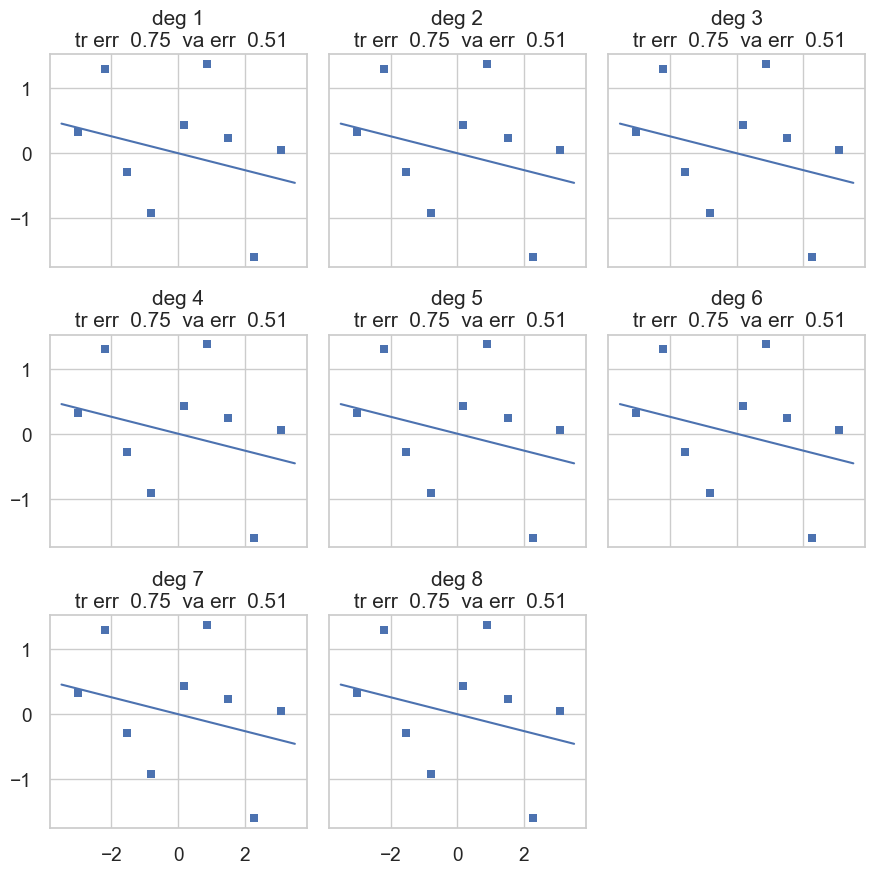

In [ ]:
fig_h, ax_33 = plt.subplots(
    nrows=3, ncols=3, sharex=True, sharey=True,
    figsize=(9,9))
ax_9 = ax_33.reshape((9,))
ax_9[-1].set_visible(False)

for ii, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8]):
    cur_ax = ax_9[ii]

    # Please Carefully Think through why we set "fit_intercept=False" here:
    # This is not because we don't want bias (i.e. set it to zero).
    # Instead, the bias(intercept) to be fitted is included as degree 0 of the polynomial.
    lin_regr = sklearn.linear_model.LinearRegression(fit_intercept=False)
    
    phi_tr_LG = x_tr_L1 # TODO fix to transform x with the sklearn code above
    phi_va_NG = x_va_N1 # TODO fix to transform validation features
    phi_te_MG = x_te_M1 # TODO fix to transform test features

    # Train the model
    lin_regr.fit(phi_tr_LG, y_tr_L)

    # Make predictions
    yhat_tr_L = lin_regr.predict(phi_tr_LG)
    yhat_va_N = lin_regr.predict(phi_va_NG)
    yhat_te_M = lin_regr.predict(phi_te_MG)
    
    # Evaluate the ERROR on training set and test set
    tr_err = sklearn.metrics.mean_squared_error(y_tr_L, yhat_tr_L)
    va_err = sklearn.metrics.mean_squared_error(y_va_N, yhat_va_N)
    te_err = sklearn.metrics.mean_squared_error(y_te_M, yhat_te_M)
    
    print("degree %d | tr err %10.3f | va err %10.3f | test err %10.3f" % (
        degree, tr_err, va_err, te_err))
    
    # Plot the predictions on current axis
    cur_ax.plot(x_te_M1, yhat_te_M, 'b-');
    cur_ax.plot(x_tr_L, y_tr_L, 'bs');
    
    cur_ax.set_title('deg %d\n tr err % .2f  va err % .2f' % 
                     (degree, tr_err, va_err))
plt.tight_layout(); # make look pretty

### Exercise 3b: Which degree offers the lowest error on the validation dataset?

In [ ]:
# TODO fill

### Exercise 3c: Which degree offers the lowest error on the test dataset?

WARNING: if you really used this to pick your degree you could not later use the test set to fairly report your model's ability to generalize. Once you use the test set to train or select, you can't reuse it.

In [ ]:
# TODO fill

<a id="part4"></a>

# Part 4: Transforms with Multiple Input Features


Now try with more than one feature (e.g. each x vector is 2-dim.) *before* transformations.

In [ ]:
my_x_N2 = np.asarray([[0, 3], [1, 4], [2, 5]])
print("Original Features my_x_N2")
print(my_x_N2)

Original Features my_x_N2
[[0 3]
 [1 4]
 [2 5]]


In [ ]:
poly = PolynomialFeatures(1)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 1-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 1-degree polynomial
[[1. 0. 3.]
 [1. 1. 4.]
 [1. 2. 5.]]


In [ ]:
poly = PolynomialFeatures(2)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 2-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 2-degree polynomial
[[ 1.  0.  3.  0.  0.  9.]
 [ 1.  1.  4.  1.  4. 16.]
 [ 1.  2.  5.  4. 10. 25.]]


There's more features here than I would have expected! I thought it would have added just $x_1^2$ and $x_2^2$. Conveniently, we can ask the feature transformer how it came up with these features

In [ ]:
input_feat_names = ['a', 'b']
poly.get_feature_names_out(input_feat_names)

array(['1', 'a', 'b', 'a^2', 'a b', 'b^2'], dtype=object)

Ahhhh so it's adding a feature that is the product of the two features. Now try 3-rd degree

In [ ]:
poly = PolynomialFeatures(3)
phi_NG = poly.fit_transform(my_x_N2)

print("Transformed Features phi_NG using 3-degree polynomial")
print(phi_NG)

Transformed Features phi_NG using 3-degree polynomial
[[  1.   0.   3.   0.   0.   9.   0.   0.   0.  27.]
 [  1.   1.   4.   1.   4.  16.   1.   4.  16.  64.]
 [  1.   2.   5.   4.  10.  25.   8.  20.  50. 125.]]


In [ ]:
poly.get_feature_names_out(input_feat_names)

array(['1', 'a', 'b', 'a^2', 'a b', 'b^2', 'a^3', 'a^2 b', 'a b^2', 'b^3'],
      dtype=object)

<a id="part5"></a>

# Part 5: Using sklearn's built in Pipeline system

Often, we want to compose together some feature transformations and some predictor (like Linear Regression)

Sklearn lets us do that easily with a Pipeline

Read up here: 

<https://scikit-learn.org/stable/modules/compose.html#pipeline>

The key advantages of pipelines here are 

**Convenience** 

A pipeline is one object that handles everything

* every time we call fit, we first transform the raw features "x" into the transformed ones "phi", and then we do linear regression fitting using those transformed features
* every time we call predict, we first transform the raw features "x" into the transformed ones "phi", and then use linear regression to predict

Otherwise, we'd have to call `make_poly_features' so many times.

**Correctness**

Pipelines help us avoid having data leaks (e.g. have test data impact the transformation we learn). More about this later in the course.

To construct a pipeline, we just provide a list of steps.

Each STEP is just a tuple:
* first entry is the string name of the step (can be anything you want)
* second entry is the constructed sklearn estimator that will implement that step

In [ ]:
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures()),
    ("step2", sklearn.linear_model.LinearRegression()),
    ])

In [ ]:
pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('step1', ...), ('step2', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


Now, we can use a pipeline like so:

degree   1 | tr err      0.743 | va err      0.512 | test err      0.640
degree   2 | tr err      0.740 | va err      0.506 | test err      0.642
degree   3 | tr err      0.726 | va err      0.486 | test err      0.707
degree   4 | tr err      0.694 | va err      0.530 | test err      0.794
degree   5 | tr err      0.008 | va err      0.419 | test err      1.314
degree   6 | tr err      0.008 | va err      0.425 | test err      1.320
degree   7 | tr err      0.005 | va err      0.307 | test err      0.459
degree   8 | tr err      0.000 | va err      0.501 | test err      5.653
degree   9 | tr err      0.000 | va err      1.816 | test err    145.318


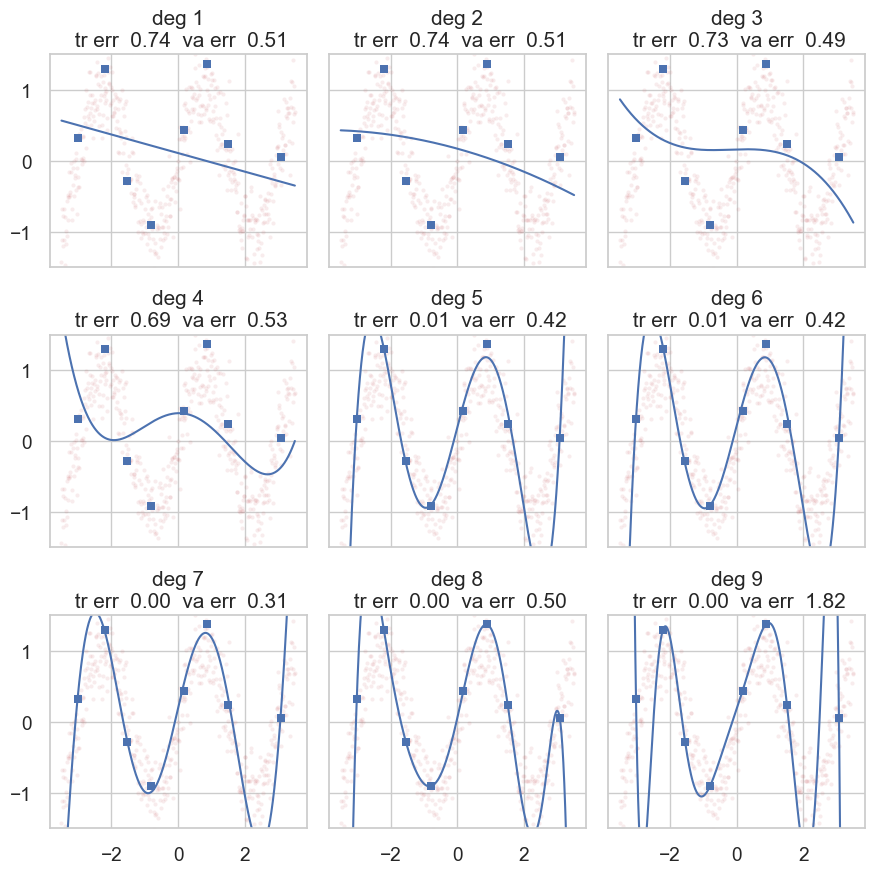

In [ ]:
fig_h, ax_33 = plt.subplots(
    nrows=3, ncols=3, sharex=True, sharey=True, figsize=(9,9))
ax_9 = ax_33.reshape((9,))

for ii, degree in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 9]):
    cur_ax = ax_9[ii]
    
    pipeline = sklearn.pipeline.Pipeline([
        ("step1", sklearn.preprocessing.PolynomialFeatures(degree)), # create custom Poly featurizer
        ("step2", sklearn.linear_model.LinearRegression()),
        ])

    # Train the model
    pipeline.fit(x_tr_L1, y_tr_L)         # Can use raw x here, unlike above

    # Make predictions
    yhat_tr_L = pipeline.predict(x_tr_L1) # Can use raw x here too!
    yhat_va_N = pipeline.predict(x_va_N1)
    yhat_te_M = pipeline.predict(x_te_M1)
    
    # Evaluate the ERROR on training set and test set
    tr_err = sklearn.metrics.mean_squared_error(y_tr_L, yhat_tr_L)
    va_err = sklearn.metrics.mean_squared_error(y_va_N, yhat_va_N)
    te_err = sklearn.metrics.mean_squared_error(y_te_M, yhat_te_M)
    
    print("degree %3d | tr err % 10.3f | va err %10.3f | test err % 10.3f" % (
        degree, tr_err, va_err, te_err))
    
    # Plot the predictions on current axis
    cur_ax.plot(x_te_M1, y_te_M, 'r.', alpha=0.1);
    cur_ax.plot(x_te_M1, yhat_te_M, 'b-');
    cur_ax.plot(x_tr_L, y_tr_L, 'bs');
    
    cur_ax.set_title('deg %d\n tr err % .2f  va err % .2f' % 
                     (degree, tr_err, va_err))
    cur_ax.set_ylim([-1.5, 1.5]);
plt.tight_layout(); # make look pretty

### Discussion 5a: Which degree would you select to minimize error on the validation set?

### Discussion 5b: For the selected model from 5a, what do you notice about the error INSIDE the bounds of observed training data versus OUTSIDE the bounds?